In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('new_retail_store_sales.csv', parse_dates=['Transaction Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  float64       
 6   Total Spent       12575 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  12575 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


In [3]:
df['Day'] = df['Transaction Date'].dt.date
df['Month'] = df['Transaction Date'].dt.to_period('M')
df['Weekday'] = df['Transaction Date'].dt.day_name()
df['Quarter'] = df['Transaction Date'].dt.to_period('Q')
df.head(30)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Day,Month,Weekday,Quarter
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,2024-04-08,2024-04,Monday,2024Q2
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,2023-07-23,2023-07,Sunday,2023Q3
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,2022-10-05,2022-10,Wednesday,2022Q4
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,Unknown,2022-05-07,2022-05,Saturday,2022Q2
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,2022-10-02,2022-10,Sunday,2022Q4
5,TXN_7482416,CUST_09,Patisserie,Item_0_PAT,20.0,10.0,200.0,Credit Card,Online,2023-11-30,Unknown,2023-11-30,2023-11,Thursday,2023Q4
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True,2023-06-10,2023-06,Saturday,2023Q2
7,TXN_1372952,CUST_21,Furniture,Item_0_FUR,33.5,5.0,167.5,Digital Wallet,In-store,2024-04-02,True,2024-04-02,2024-04,Tuesday,2024Q2
8,TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,False,2023-04-26,2023-04,Wednesday,2023Q2
9,TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,False,2024-03-14,2024-03,Thursday,2024Q1


In [4]:
#Cramer's V (categorical variables)
def cramers_v(contingency_table):
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * min(contingency_table.shape) - 1)).round(3)
    print(f"\nChi²: {chi2.round(3)}, p-value: {p.round(3)}, dof: {dof}")

    if cramers_v < 0.1:
        print(f"{cramers_v} < 0.1 - weak association")
    elif 0.1 < cramers_v < 0.3:
        print(f"0.1 < {cramers_v} < 0.3 - moderate associations")
    elif 0.3 < cramers_v < 0.7:
        print(f"0.3 < {cramers_v} < 0.7 - strong associations")
    else:
        print(f"{cramers_v} > 0.7 - very strong associations")

location_weekday = pd.crosstab(df['Location'], df['Weekday'])
cramers_v(location_weekday)


Chi²: 5.024, p-value: 0.541, dof: 6
0.014 < 0.1 - weak association


In [5]:
# df['Total Spent'].describe()
bins = [0, 52, 108.5, 190, 410]
labels = ['Very Low', 'Low', 'Medium', 'High']
df['Spent Category'] = pd.cut(df['Total Spent'], bins=bins, labels=labels, include_lowest=True)

spent_weekday = pd.crosstab(df['Spent Category'], df['Weekday'])
cramers_v(spent_weekday)


Chi²: 28.367, p-value: 0.057, dof: 18
0.024 < 0.1 - weak association


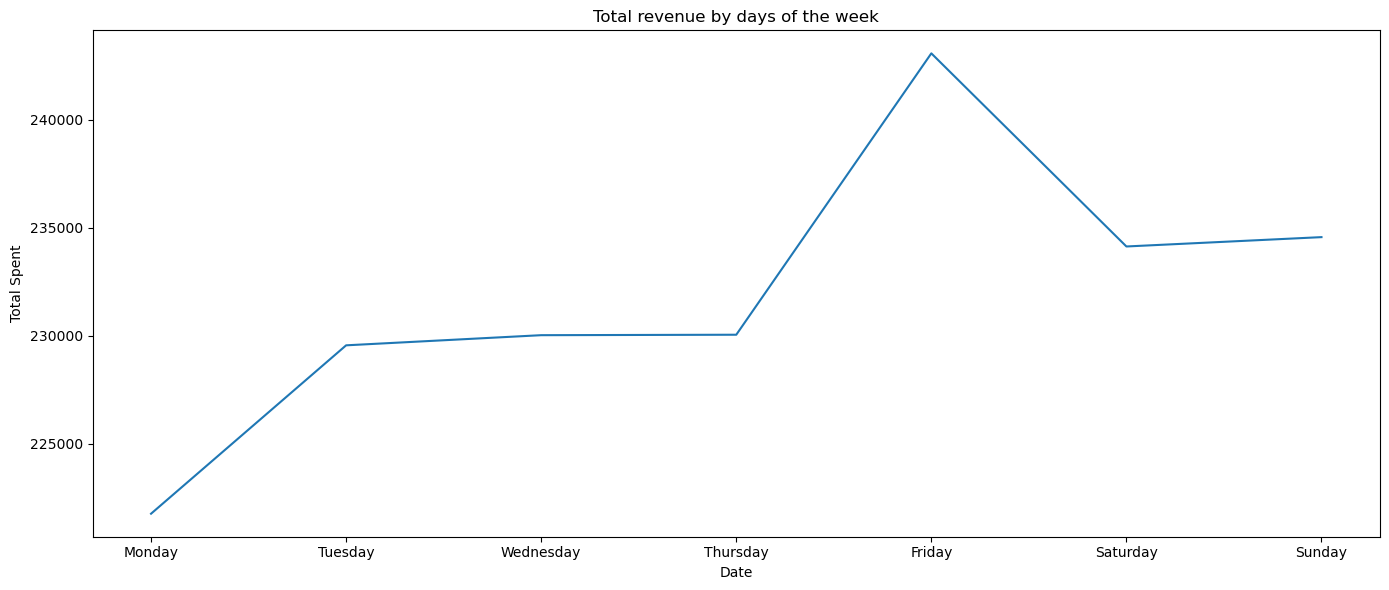

In [6]:
# revenue by days of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue = df.groupby('Weekday')['Total Spent'].sum().reindex(weekday_order)

plt.figure(figsize=(14,6))
sns.lineplot(x=daily_revenue.index, y=daily_revenue.values)
plt.title('Total revenue by days of the week')
plt.xlabel('Date')
plt.ylabel('Total Spent')
plt.xticks()
plt.tight_layout()
plt.show()

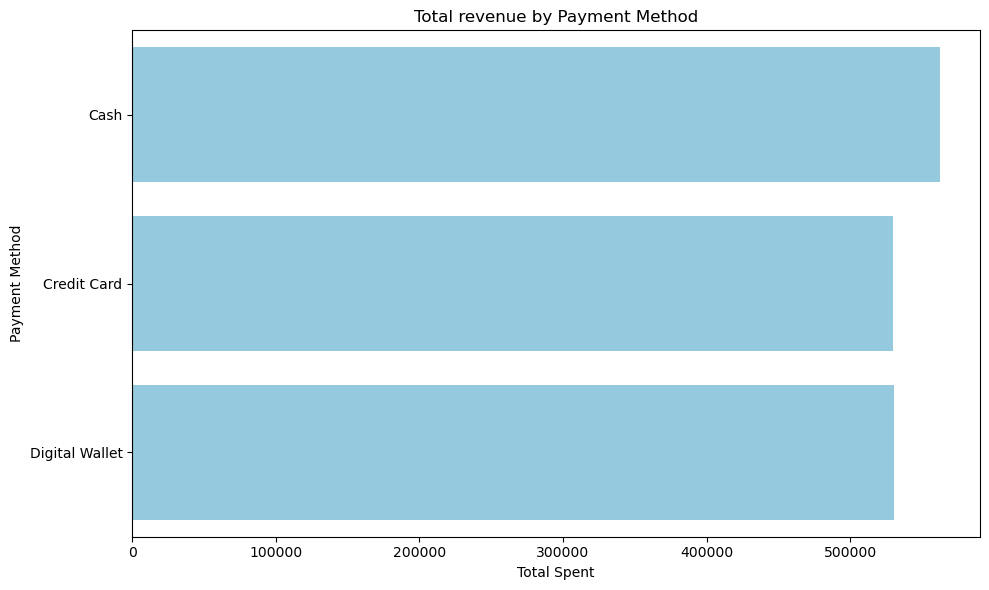

In [7]:
# revenue by Payment Method
spent_method = df.groupby('Payment Method')['Total Spent'].sum()

plt.figure(figsize=(10,6))
sns.barplot(x=spent_method.values, y=spent_method.index, color="skyblue")
plt.title('Total revenue by Payment Method')
plt.xlabel('Total Spent')
plt.ylabel('Payment Method')
plt.tight_layout()
plt.show()

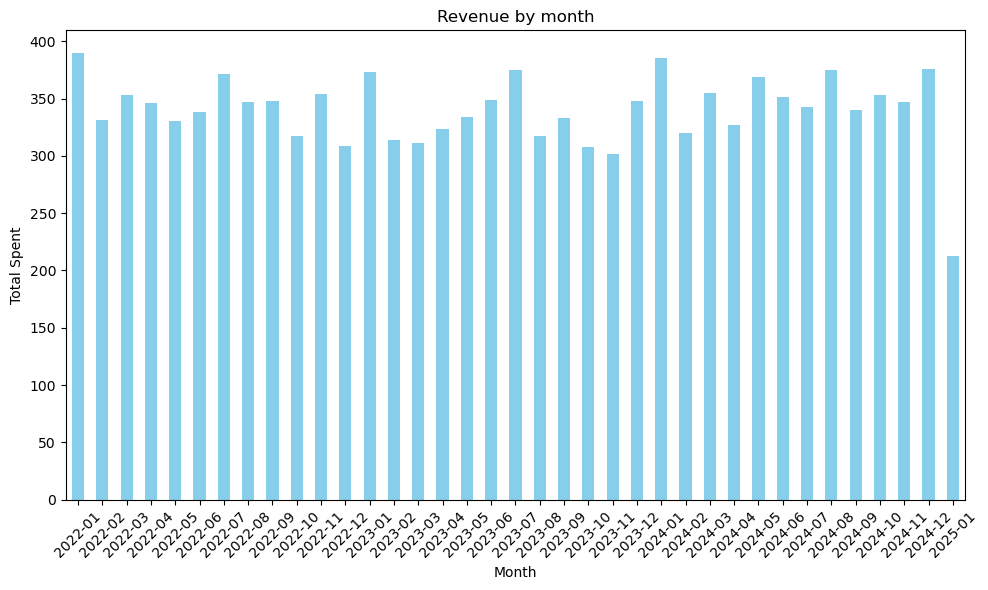

In [8]:
# revenue by month
monthly_sales = df.groupby('Month').size()

plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Revenue by month')
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


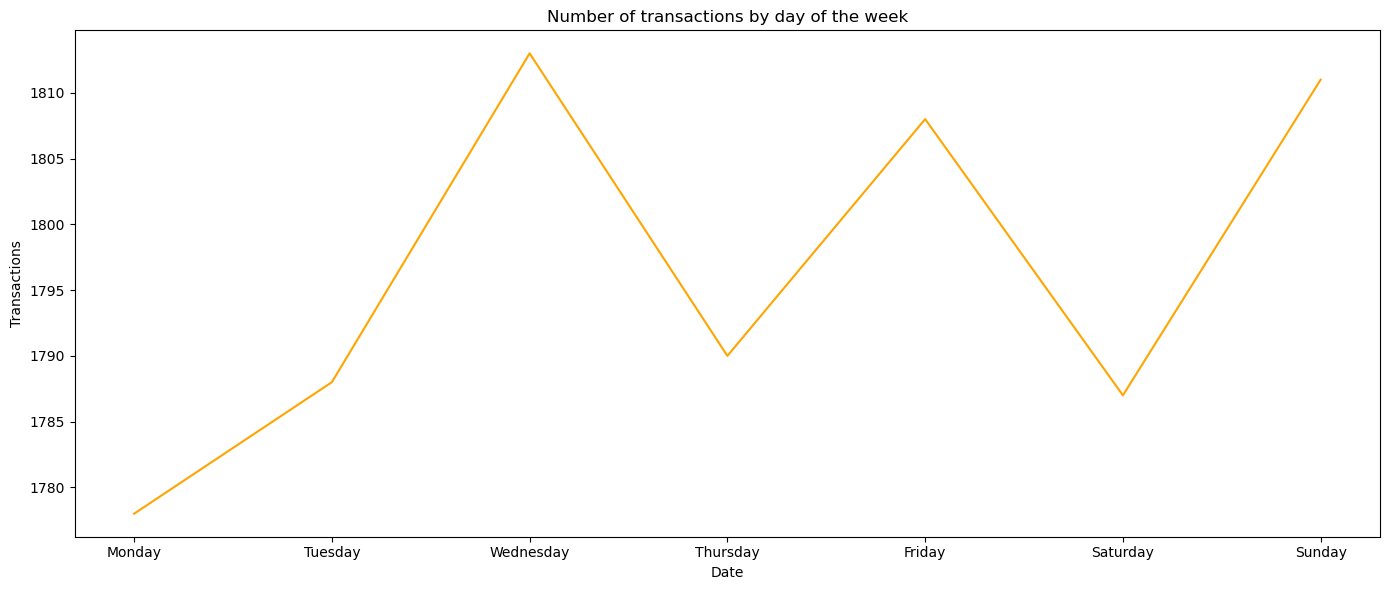

In [9]:
# transactions by days of the week
daily_transactions = df.groupby('Weekday')['Transaction ID'].count().reindex(weekday_order)

plt.figure(figsize=(14,6))
sns.lineplot(x=daily_transactions.index, y=daily_transactions.values, color='orange')
plt.title('Number of transactions by day of the week')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.xticks()
plt.tight_layout()
plt.show()

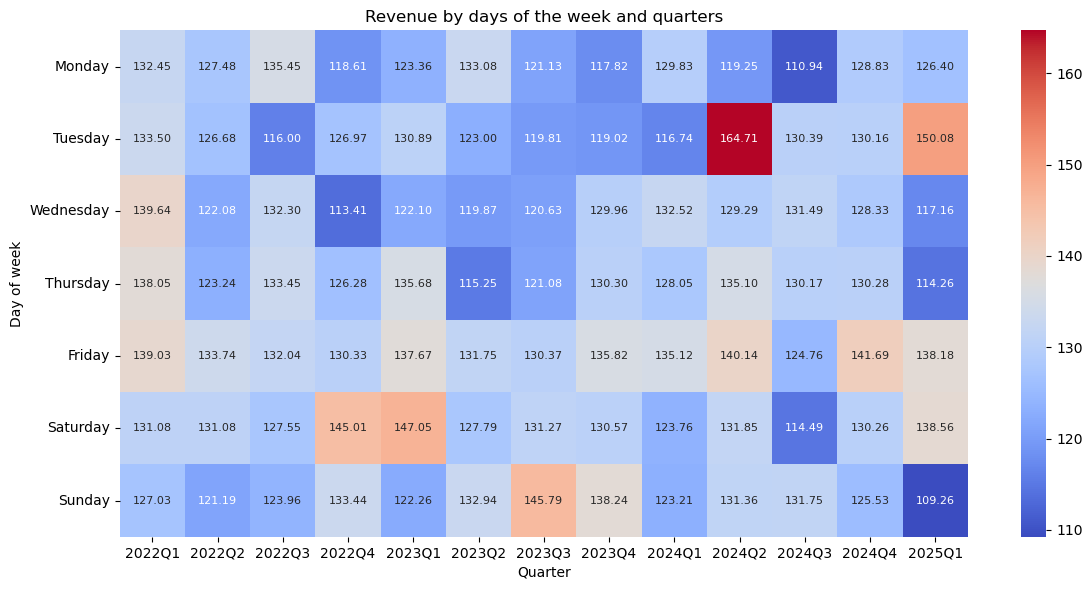

In [10]:
# revenue by days of the week and quarters
heatmap_data = df.pivot_table(values='Total Spent', 
                              index='Weekday', 
                              columns='Quarter', 
                              aggfunc='mean')

heatmap_data = heatmap_data.reindex(weekday_order)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm',
            annot_kws={"size": 8})
plt.title("Revenue by days of the week and quarters")
plt.xlabel("Quarter")
plt.ylabel("Day of week")
plt.tight_layout()
plt.show()

In [11]:
# metrics
def calculate_metrics(df):
    unique_customers = df['Customer ID'].nunique()
    unique_category = sorted(df['Category'].unique())
    transactions = df['Transaction ID'].nunique()
    total_revenue = df["Total Spent"].sum()
    average_check = round(df["Total Spent"].mean(), 2)
    check_per_customer = round(df.groupby("Customer ID")["Total Spent"].sum().mean(), 2)
    
    metrics = {
        "unique_customers": unique_customers,
        "unique_category_count": len(unique_category),
        "unique_categories": unique_category,
        "total_transactions": transactions,
        "total_revenue": total_revenue,
        "average_check": average_check,
        "average_check_per_customer": check_per_customer
    }
    
    return metrics

calculate_metrics(df)

#for index, value in enumerate(metrics['unique_categories'], 1):
#    print(f"{index}.", value)


{'unique_customers': 25,
 'unique_category_count': 8,
 'unique_categories': ['Beverages',
  'Butchers',
  'Computers and electric accessories',
  'Electric household essentials',
  'Food',
  'Furniture',
  'Milk Products',
  'Patisserie'],
 'total_transactions': 12575,
 'total_revenue': 1623151.0,
 'average_check': 129.08,
 'average_check_per_customer': 64926.04}

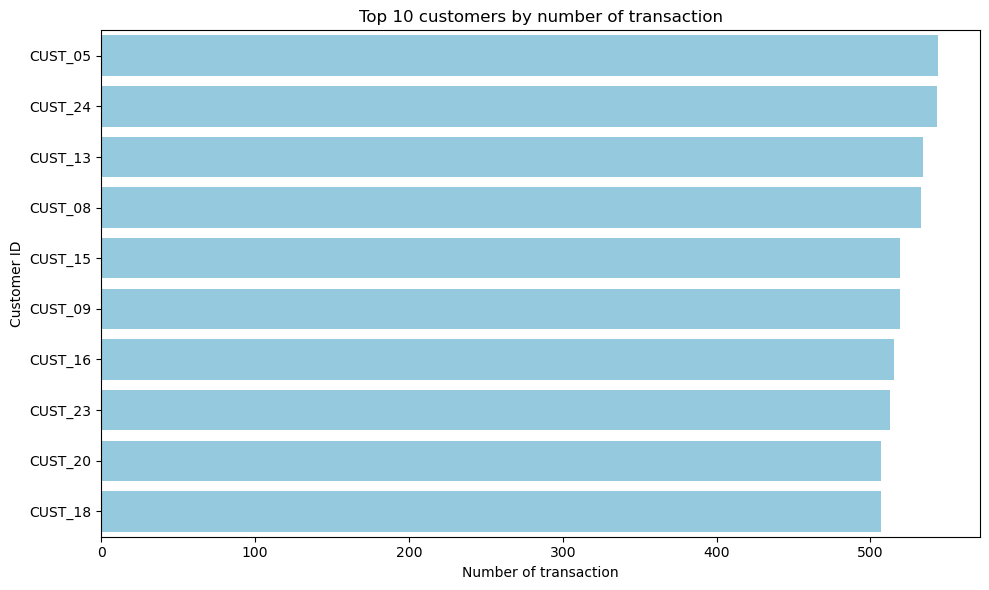

In [12]:
# top 10 customers by number of transaction
transactions_per_customer = df.groupby('Customer ID')['Transaction ID'].nunique().sort_values(ascending=False)
top_customers = transactions_per_customer.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index, color="skyblue")
plt.title('Top 10 customers by number of transaction')
plt.xlabel('Number of transaction')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()